# MARKETING ANALYSIS AND REVENUE PREDICTION

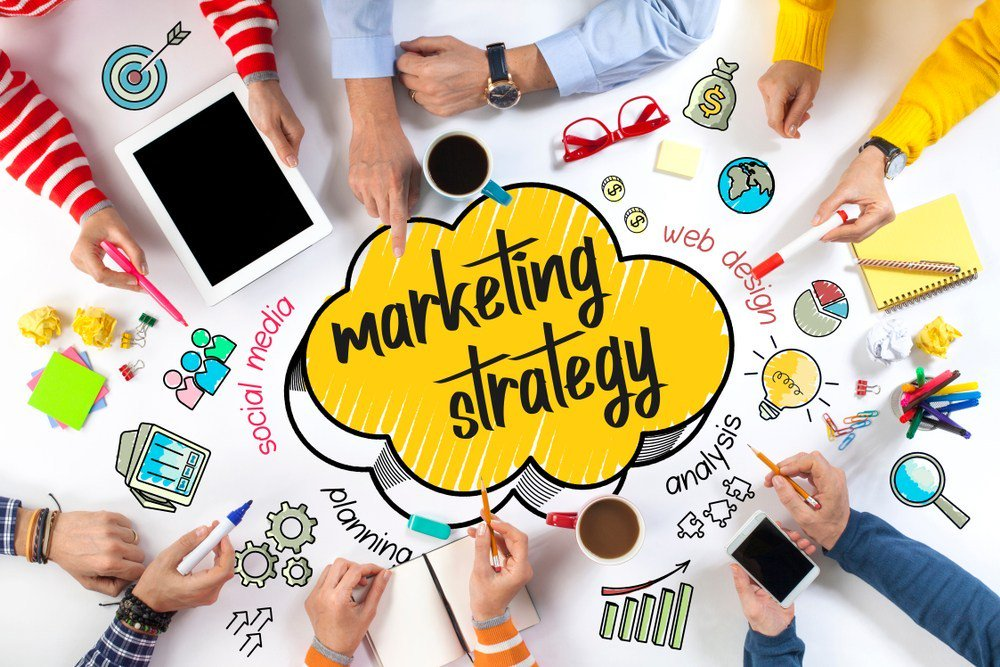

In [182]:
from IPython.display import Image
Image(filename='marketing-stregy.jpg', width=1000, height=1000)

# IMPORTING LIBRARIES

In [183]:
#Importing libraries for data cleaning, processing and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express  as px

#Importing libaries for machine learning
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from statsmodels.formula.api import ols
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR


# IMPORTING DATA

In [184]:
df=pd.read_csv('Project Dataset.csv')
df.head()

,Unnamed: 0,revenue,reach,local_tv,online,instore,person,event
0,845,45860.28,2,31694.91,2115,3296,8,non_event
1,483,63588.23,2,35040.17,1826,2501,14,special
2,513,23272.69,4,30992.82,1851,2524,6,special
3,599,45911.23,2,29417.78,2437,3049,12,special
4,120,36644.23,2,35611.11,1122,1142,13,cobranding


**Observation:** 

- The dataframe has Eight features namely event, people, instore, online, local tv, reach, revenue and unnammed: 0.
- The Revenue feature is the total amount of revenue generated by the company considering all routes of advertisement employed.
- The reach feature is number of tweets on promoting the company.
- The local TV feature amount to the investment on local television advertisement.
- The Online feature amount to the investment on online advertisement.
- The Person feature entails the input of staffs.
- The instore feature amount to the investemnt on instore advertisement, this may include posters and displays.
- The event feature entails the events held to promote the store.
- The unnammed :0 feature is a redudant column.

# DATA CLEANING

**Checking more information about thw data Frame**

In [185]:
print(df.info())
print('')
print('')
print("Missing values:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  985 non-null    int64  
 1   revenue     985 non-null    float64
 2   reach       985 non-null    int64  
 3   local_tv    929 non-null    float64
 4   online      985 non-null    int64  
 5   instore     985 non-null    int64  
 6   person      985 non-null    int64  
 7   event       985 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 61.7+ KB
None


Missing values:
Unnamed: 0     0
revenue        0
reach          0
local_tv      56
online         0
instore        0
person         0
event          0
dtype: int64


**Observation:** 

- The dataframe has 5 int64, 2 float64 and  1 object datatype. There are 985 observations with missing values on the local_tv column. 
- Local Television has 56 missing values. 
- The question is, is it missing because  no money  was invested on local tv advertisement or the amount was not recorded?

**Dropping redudant column**

In [186]:
#Dropping unnammed: o column
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,revenue,reach,local_tv,online,instore,person,event
0,45860.28,2,31694.91,2115,3296,8,non_event
1,63588.23,2,35040.17,1826,2501,14,special
2,23272.69,4,30992.82,1851,2524,6,special
3,45911.23,2,29417.78,2437,3049,12,special
4,36644.23,2,35611.11,1122,1142,13,cobranding
...,...,...,...,...,...,...,...
980,59546.57,2,31233.04,1849,4335,18,special
981,31138.22,3,34346.13,1200,3166,8,non_event
982,53704.80,4,NaN,1868,1649,15,cobranding
983,59909.10,3,30215.90,1532,3702,16,cobranding


# Exploratory Data Analysis

**Univariate Analysis**

---



**statistics of the numerical data**

In [187]:
#Five number summary, standard deviation and mean of the numerical adata
df.describe()

,revenue,reach,local_tv,online,instore,person
count,985.000000,985.000000,929.000000,985.000000,985.000000,985.000000
mean,38357.355025,3.395939,31324.061109,1596.527919,3350.962437,11.053807
std,11675.603883,1.011913,3970.934733,496.131586,976.546381,3.041740
min,5000.000000,0.000000,20000.000000,0.000000,0.000000,0.000000
25%,30223.600000,3.000000,28733.830000,1253.000000,2690.000000,9.000000
50%,38159.110000,3.000000,31104.520000,1607.000000,3351.000000,11.000000
75%,45826.520000,4.000000,33972.410000,1921.000000,4011.000000,13.000000
max,79342.070000,7.000000,43676.900000,3280.000000,6489.000000,24.000000


**Density Plot  for the numerical data**

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

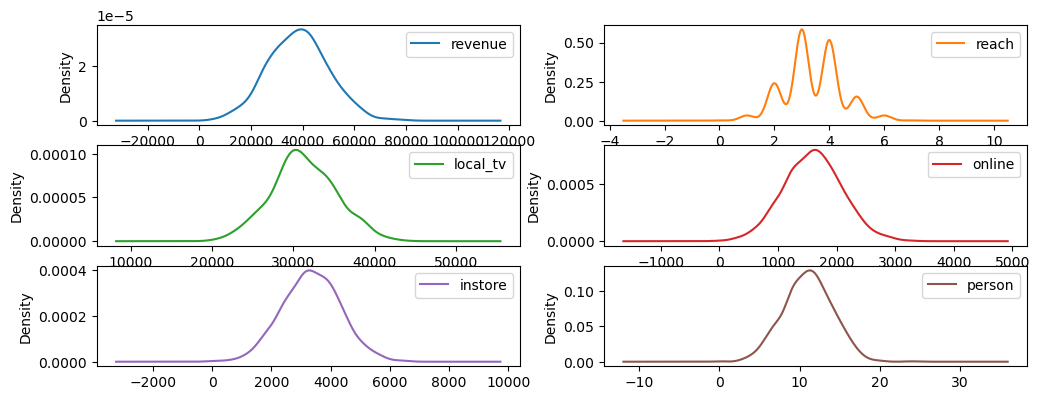

In [188]:
# Create the density plot
df.plot(kind='density', subplots=True,layout=(4,2) ,sharex=False, figsize=(12, 6))

**Observation:** 

- All features are normally distributed beside the reach feature that has many peaks.
- The average amount of revenue generated was 38357, with the maximum of 79342 and the minimum of 5000. The below average may be accounted to the  early stage of advertisement because companies often prioritize growth over immediate profitability and may accept lower profits or even losses in the short term while focusing on expanding their market presence. However, if the date was given as one of the feature, the notion could have been easily confirmed.
- More investments were made on Television advertisement, with its average 7000 less than the average of revenue generated. Television are considered because is a mass medium that reaches large and diverse audience. Thus, since it is a local television, this is a fastest way to market to local people. Moreover, Television combines both visual and audio element which create a compelling and memorable experience to viewers. Also, advertising on television improve trust and credibility since television is a trusted medium. 
- The minimum instore investement is zero, this may negatively impact revenues since advertisement enhance the Shopping Experience.
- The minimum in person advertisemnt is zero, this may negatively impact the revenues because in person advertisement can garner direct sales opportunities. Moreover, in person advertisement ensure immediate feedback, also show brand visibility and reinforce physical identity. 

**Pie chart of the Counts of events held**

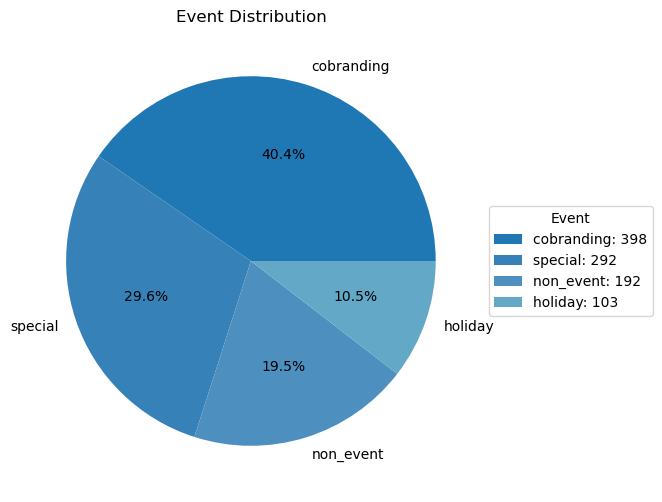

In [189]:
# Calculating the value counts of the 'event' column
event_counts = df['event'].value_counts()

# Defining shades of blue colors
colors = ['#1f77b4', '#3581b8', '#4d8fbf', '#63a8c6', '#79b0cd']

# Plotting the pie chart with custom colors
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(event_counts.values, labels=event_counts.index, autopct='%1.1f%%', colors=colors)

# Title
plt.title('Event Distribution')

# Move the legend to the right side
legend_labels = [f'{event}: {count}' for event, count in zip(event_counts.index, event_counts.values)]
ax.legend(legend_labels, title='Event', loc='center left', bbox_to_anchor=(1, 0.5))

# Display the plot
plt.show()

**Observation:** 

- Co-branding, a marketing strategy that involves two or more brands in an alliance to create a new product or service with its own brand name and logo, amount to most events that was held. 


**Multivariate Analysis**

---



<AxesSubplot:>

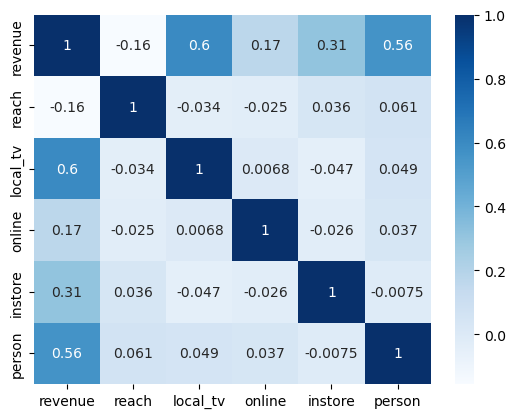

In [190]:
#Heatmap of the numeric values
sns.heatmap((df.drop('event', axis=1)).corr(),cmap="Blues", annot=True)

**Observation**
- There is no sign of Multicolinearity. 
- There is a moderate positive correlation between  Local television advertisement and Revenue. Thus, for the company to increase revenues, they should invest even more on Local TV advertisement in order for them to harness more revenue.
- An increase in store sales staff input has moderate positive correlation with Revenue. Thus, the company should also encourage in person markerting. 
- There is a weak negative correlation between Revenue and number of tweets. The company should gain more insights on twitter to ensure that it doesn't hamper their revenue. 
- Online and instore advertisement have weak positive correlation with revenue. These two advertisement routes don't have a great impact on the revenue. 

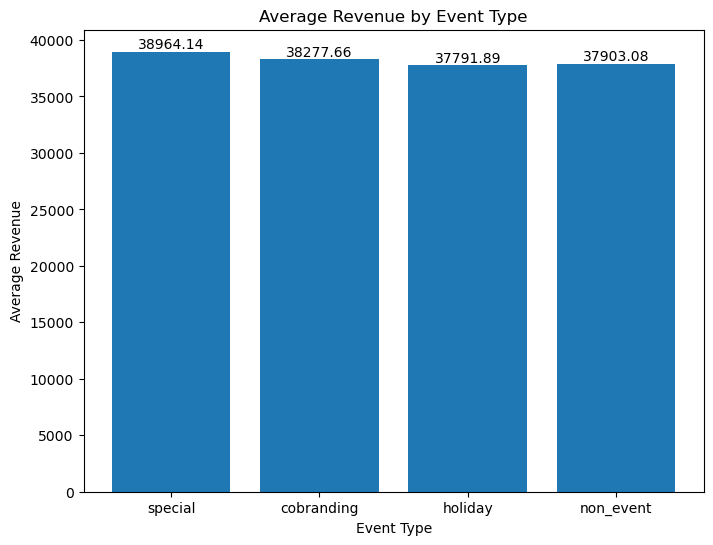

In [191]:

# Filtering data for each event type
special = df[df['event'] == 'special']
cobranding = df[df['event'] == 'cobranding']
holiday = df[df['event'] == 'holiday']
non_event = df[df['event'] == 'non_event']

# Calculate revenue sums for each event type
event_revenue = {
    'special': special['revenue'].mean(),
    'cobranding': cobranding['revenue'].mean(),
    'holiday': holiday['revenue'].mean(),
    'non_event': non_event['revenue'].mean()
}

# Plotting the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(event_revenue.keys(), event_revenue.values())

# Adding the values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%.2f' % height, ha='center', va='bottom')

# Title and labels
plt.title('Average Revenue by Event Type')
plt.xlabel('Event Type')
plt.ylabel('Average Revenue')

# Displaying the plot
plt.show()

**Observation:**

- Though many cobranding events where held compared to  Special events, the latter garner higher average revenues than the other events. Thus, an increase in proportion of Special events may make a positive impact on the revenue.  

# Feature Engineering

**HANDLING LOCAL TELEVISION COLUMN**

---



**Checking the number of missing values**

In [192]:
#Number of missing values
print('Number of missing values:', df['local_tv'].isnull().sum())

Number of missing values: 56


**Checking the mean, median and mode**

In [193]:
# Skewness
print('Skewness', df['local_tv'].skew())
# Kurtosis
print('Kurtosis', df['local_tv'].kurtosis())
# Mean
print('Mean:', df['local_tv'].mean())
# Median
print('Median', df['local_tv'].median())
# Mode
print('Mode', df['local_tv'].mode()[0])

Skewness 0.0850322979027817
Kurtosis -0.10913552096582313
Mean: 31324.06110871904
Median 31104.52
Mode 20000.0


**Observation:** 

- The Skewness results illustrates that the data is normally distributed and the kurtosis shows no presence of outliers.
- The Mean and Median expense of the local tv advertisement doesn't have great variance.
- However, there is 11000 difference between the value that the company spent the most on local television advertisement and the average amount they spend on local television  advertisement.

**Filling the missing values**

In [194]:
#Filling the missing values with the mean
df_mean=pd.DataFrame(df['local_tv'].replace(np.nan,df['local_tv'].mean()))
#Filling the missing values with the mode
df_mode=pd.DataFrame(df['local_tv'].replace(np.nan,df['local_tv'].mode()[0]))
#Filling the missing values with the median
df_median=pd.DataFrame(df['local_tv'].replace(np.nan,df['local_tv'].median()))

In [195]:
#Skewness 
print('Skewness')
print('')
print('Skewness', df['local_tv'].skew())
print('Mode_skewness', df_mode['local_tv'].skew())
print('Mean_skewness', df_mean['local_tv'].skew())
print('Median_skewness', df_median['local_tv'].skew())
#Kurtosis
print("")
print('Kurtosis')
print("")
print('Kurtosis', df['local_tv'].kurtosis())
print('Mode_Kurtosis', df_mode['local_tv'].kurtosis())
print('Mean_Kurtosis', df_mean['local_tv'].kurtosis())
print('Median_Kurtosis', df_median['local_tv'].kurtosis())

Skewness

Skewness 0.0850322979027817
Mode_skewness -0.3490963929697198
Mean_skewness 0.08754960872441551
Median_skewness 0.09724520249790865

Kurtosis

Kurtosis -0.10913552096582313
Mode_Kurtosis 0.10828353556972425
Mean_Kurtosis 0.06532306319532655
Median_Kurtosis 0.06545501758960226


**Observation** 

- There is no great variation between skewness of data while using mean, mode and median.
- However, the mean shows little skewness difference from the original data. Thus,  the mean will be used to fill the missing values.


**Filling the data with Mean**

In [196]:
#Filling the missing values with the mean
df['local_tv']=df['local_tv'].replace(np.nan,df['local_tv'].mean())

**ENCODING CATEGORICAL DATA**

---



In [197]:
df=df.drop(columns=['event', 'reach', 'instore','person', 'online'], axis=1)
df

,revenue,local_tv,person
0,45860.28,31694.910000,8
1,63588.23,35040.170000,14
2,23272.69,30992.820000,6
3,45911.23,29417.780000,12
4,36644.23,35611.110000,13
...,...,...,...
980,59546.57,31233.040000,18
981,31138.22,34346.130000,8
982,53704.80,31324.061109,15
983,59909.10,30215.900000,16


# MODELING

**Spliting the data into Preditors and response variable**

In [198]:
#Response Variable
y = df['revenue']
y=np.array(y)
#Predictor variable(Dropping Response variable)
df= df.drop('revenue', axis=1)

**Standardization of Predictors**

In [199]:
st=StandardScaler()
x=st.fit_transform(df)

**Spliting the data into training and testing data**

In [200]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Building Different Models**

In [201]:
#Linear Regression
lr= LinearRegression()
#Lasso Regression
lsr=Lasso()
#Ridge Regression
rr= Ridge(alpha=0.1)
#Support Vector Machine
sr=SVR(kernel='rbf', gamma='auto', C=1000)
#Decision Tree
dtr=DecisionTreeRegressor(max_depth=7, random_state=42)
#Random Forest Regressor
rfr = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=42)

**Fitting different model to training data**

In [202]:
#Linear Regression
lr.fit(x_train,y_train)
#Ridge Regression
lsr.fit(x_train,y_train)
#Ridge Regression
rr.fit(x_train,y_train)
#Support Vector Machine
sr.fit(x_train, y_train)
#Decision Tree
dtr.fit(x_train,y_train)
#Random Forest
rfr.fit(x_train,y_train)

RandomForestRegressor(max_depth=7, random_state=42)

**Predicting on the training data**

In [203]:
#Linear Regression
lr_y_train = lr.predict(x_train)
#Lasso Regression
lsr_y_train = lsr.predict(x_train)
#Ridge Regression
rr_y_train = rr.predict(x_train)
#Support Vector Machine
sr_y_train = sr.predict(x_train)
#Decision Tree
dtr_y_train = dtr.predict(x_train)
#Random Forest
rfr_y_train = rfr.predict(x_train)

**Predicting on the Testing data**

In [204]:
#Linear Regression 
lr_y_testing = lr.predict(x_test)
#Lasso Regression 
lsr_y_testing = lsr.predict(x_test)
#Ridge Regression 
rr_y_testing = rr.predict(x_test)
#Support Vector Machine
sr_y_testing = sr.predict(x_test)
#Decision tree Regression 
dtr_y_testing = dtr.predict(x_test)
#Random Forest Regressor 
rfr_y_testing = rfr.predict(x_test)

**R squared score on Training data**

In [205]:
print('Linear Regression:', r2_score(y_train, lr_y_train))
print('Lasso Regression:', r2_score(y_train, lsr_y_train))
print('Ridge Regression:', r2_score(y_train, rr_y_train))
print('Support Vector Machine: :', r2_score(y_train, sr_y_train))
print('Decision Tree:', r2_score(y_train, dtr_y_train))
print('Random Forest:', r2_score(y_train, rfr_y_train))

Linear Regression: 0.6290446289885241
Lasso Regression: 0.6290446156193839
Ridge Regression: 0.6290446202046552
Support Vector Machine: : 0.5620790678302694
Decision Tree: 0.7459074573718059
Random Forest: 0.7621266626396589


**R Squared score on Testing data**

In [206]:
print('Linear Regression:', r2_score(y_test, lr_y_testing))
print('Lasso Regression:', r2_score(y_test, lsr_y_testing))
print('Ridge Regression:', r2_score(y_test, rr_y_testing))
print('Support Vector Machine:', r2_score(y_test, sr_y_testing))
print('Decision Tree:', r2_score(y_test, dtr_y_testing))
print('Random Forest:', r2_score(y_test, rfr_y_testing))

Linear Regression: 0.6279246558452212
Lasso Regression: 0.6279230913496611
Ridge Regression: 0.6279236976001359
Support Vector Machine: 0.605119365848866
Decision Tree: 0.5617343752434705
Random Forest: 0.6023911087936284


**Root mean squared error on Training data**

In [207]:
print('Linear Regression:', np.sqrt(mean_squared_error(y_train, lr_y_train)))
print('Lasso Regression:', np.sqrt(mean_squared_error(y_train, lsr_y_train)))
print('Ridge Regression:', np.sqrt(mean_squared_error(y_train, rr_y_train)))
print('Support Vector Machine:', np.sqrt(mean_squared_error(y_train, sr_y_train)))
print('Decision Tree:', np.sqrt(mean_squared_error(y_train, dtr_y_train)))
print('Random Forest:', np.sqrt(mean_squared_error(y_train, rfr_y_train)))

Linear Regression: 7186.517732545653
Lasso Regression: 7186.5178620458155
Ridge Regression: 7186.51781763059
Support Vector Machine: 7808.282580807265
Decision Tree: 5947.762649477408
Random Forest: 5754.804209778547


**Root mean squared error on Training data**

In [208]:
print('Linear Regression:', np.sqrt(mean_squared_error(y_test, lr_y_testing)))
print('Lasso Regression:', np.sqrt(mean_squared_error(y_test, lsr_y_testing)))
print('Ridge Regression:', np.sqrt(mean_squared_error(y_test, rr_y_testing)))
print('Support Vector Machine:', np.sqrt(mean_squared_error(y_test, sr_y_testing)))
print('Decision Tree:', np.sqrt(mean_squared_error(y_test, dtr_y_testing)))
print('Random Forest:', np.sqrt(mean_squared_error(y_test, rfr_y_testing)))

Linear Regression: 6789.707281826407
Lasso Regression: 6789.721556429518
Ridge Regression: 6789.716024947319
Support Vector Machine: 6994.690828065474
Decision Tree: 7368.927936316671
Random Forest: 7018.812631407876


In [ ]:
model=ols('y~X',store).fit()